Project on Attitude Dynamics and Control of a Night Imaging LEO Satellite

A small satellite revolves in a slightly elliptical low Earth orbit (eccentricity = 0.01). Initially, the satellite is on the sunlit side of the Earth with a random orientation and body angular velocity. ( (In addition to orbiting the Earth, the satellite also has its own body frame rotation about an instantaneous axis). ) To orient the satellite in a specific direction (attitude), torque is applied using either attitude control thrusters or reaction wheels.
Simulation Project Outline:
When the satellite is on the sunlit side of the Earth, its solar panels are pointed toward the Sun for power generation. The blue arrow in the simulation represents the direction of the solar panels.


Upon entering Earth's shadow, the satellite's sensors are pointed toward the Earth’s center for night imaging. Night imaging satellite missions can include applications such as wildfire detection, tracking animal activity at night, weather monitoring etc. The red arrow in the simulation represents the direction of the sensors.


After collecting night data, the satellite's antenna is pointed toward a geostationary (GEO) satellite to transmit the data. The black arrow in the simulation represents the direction of the antenna.


The transition from the initial orientation to sun-pointing mode is relatively stable (overdamped). However, the transitions from sun-pointing to Earth-pointing (nadir) and from Earth-pointing to GEO-pointing are rapid (slew and underdamped). During these maneuvers, the satellite's angular velocity remains below 10 degrees per second, and torques remain within the 0.1 Nm range. If needed, the control gains can be fine-tuned to ensure compliance with torque and angular velocity limits.
Key Elements of the Code:
1. Orbital Mechanics:
The orbits of both the LEO and GEO satellites are plotted based on Kepler’s laws of motion.

2. Attitude Dynamics and Control of the LEO Satellite:
    
The relationship between body angular velocity rates, moments of inertia, applied torques, and body angular velocity is governed by Euler’s equations of rotational motion.


The relationship between MRP (Modified Rodrigues Parameters) rates and body angular velocity is derived from MRP kinematic differential equations. The MRPs indicate the satellite's orientation relative to the Earth-fixed inertial coordinate system


A proportional feedback control law is used to apply torques to the LEO satellite.


The applied torque is based on the difference between the current and desired body angular velocity and orientation.


MRP rates and body angular velocity rates are integrated using the fourth-order Runge-Kutta algorithm.


For anyone interested, the Python file can be found on GitHub account.
(Note: The data is downsampled to speed up animation.)

References:
Schaub, H., & Junkins, J. L. (2021). Analytical Mechanics of Space Systems (4th ed.). AIAA.




The folowing figures are for clarity

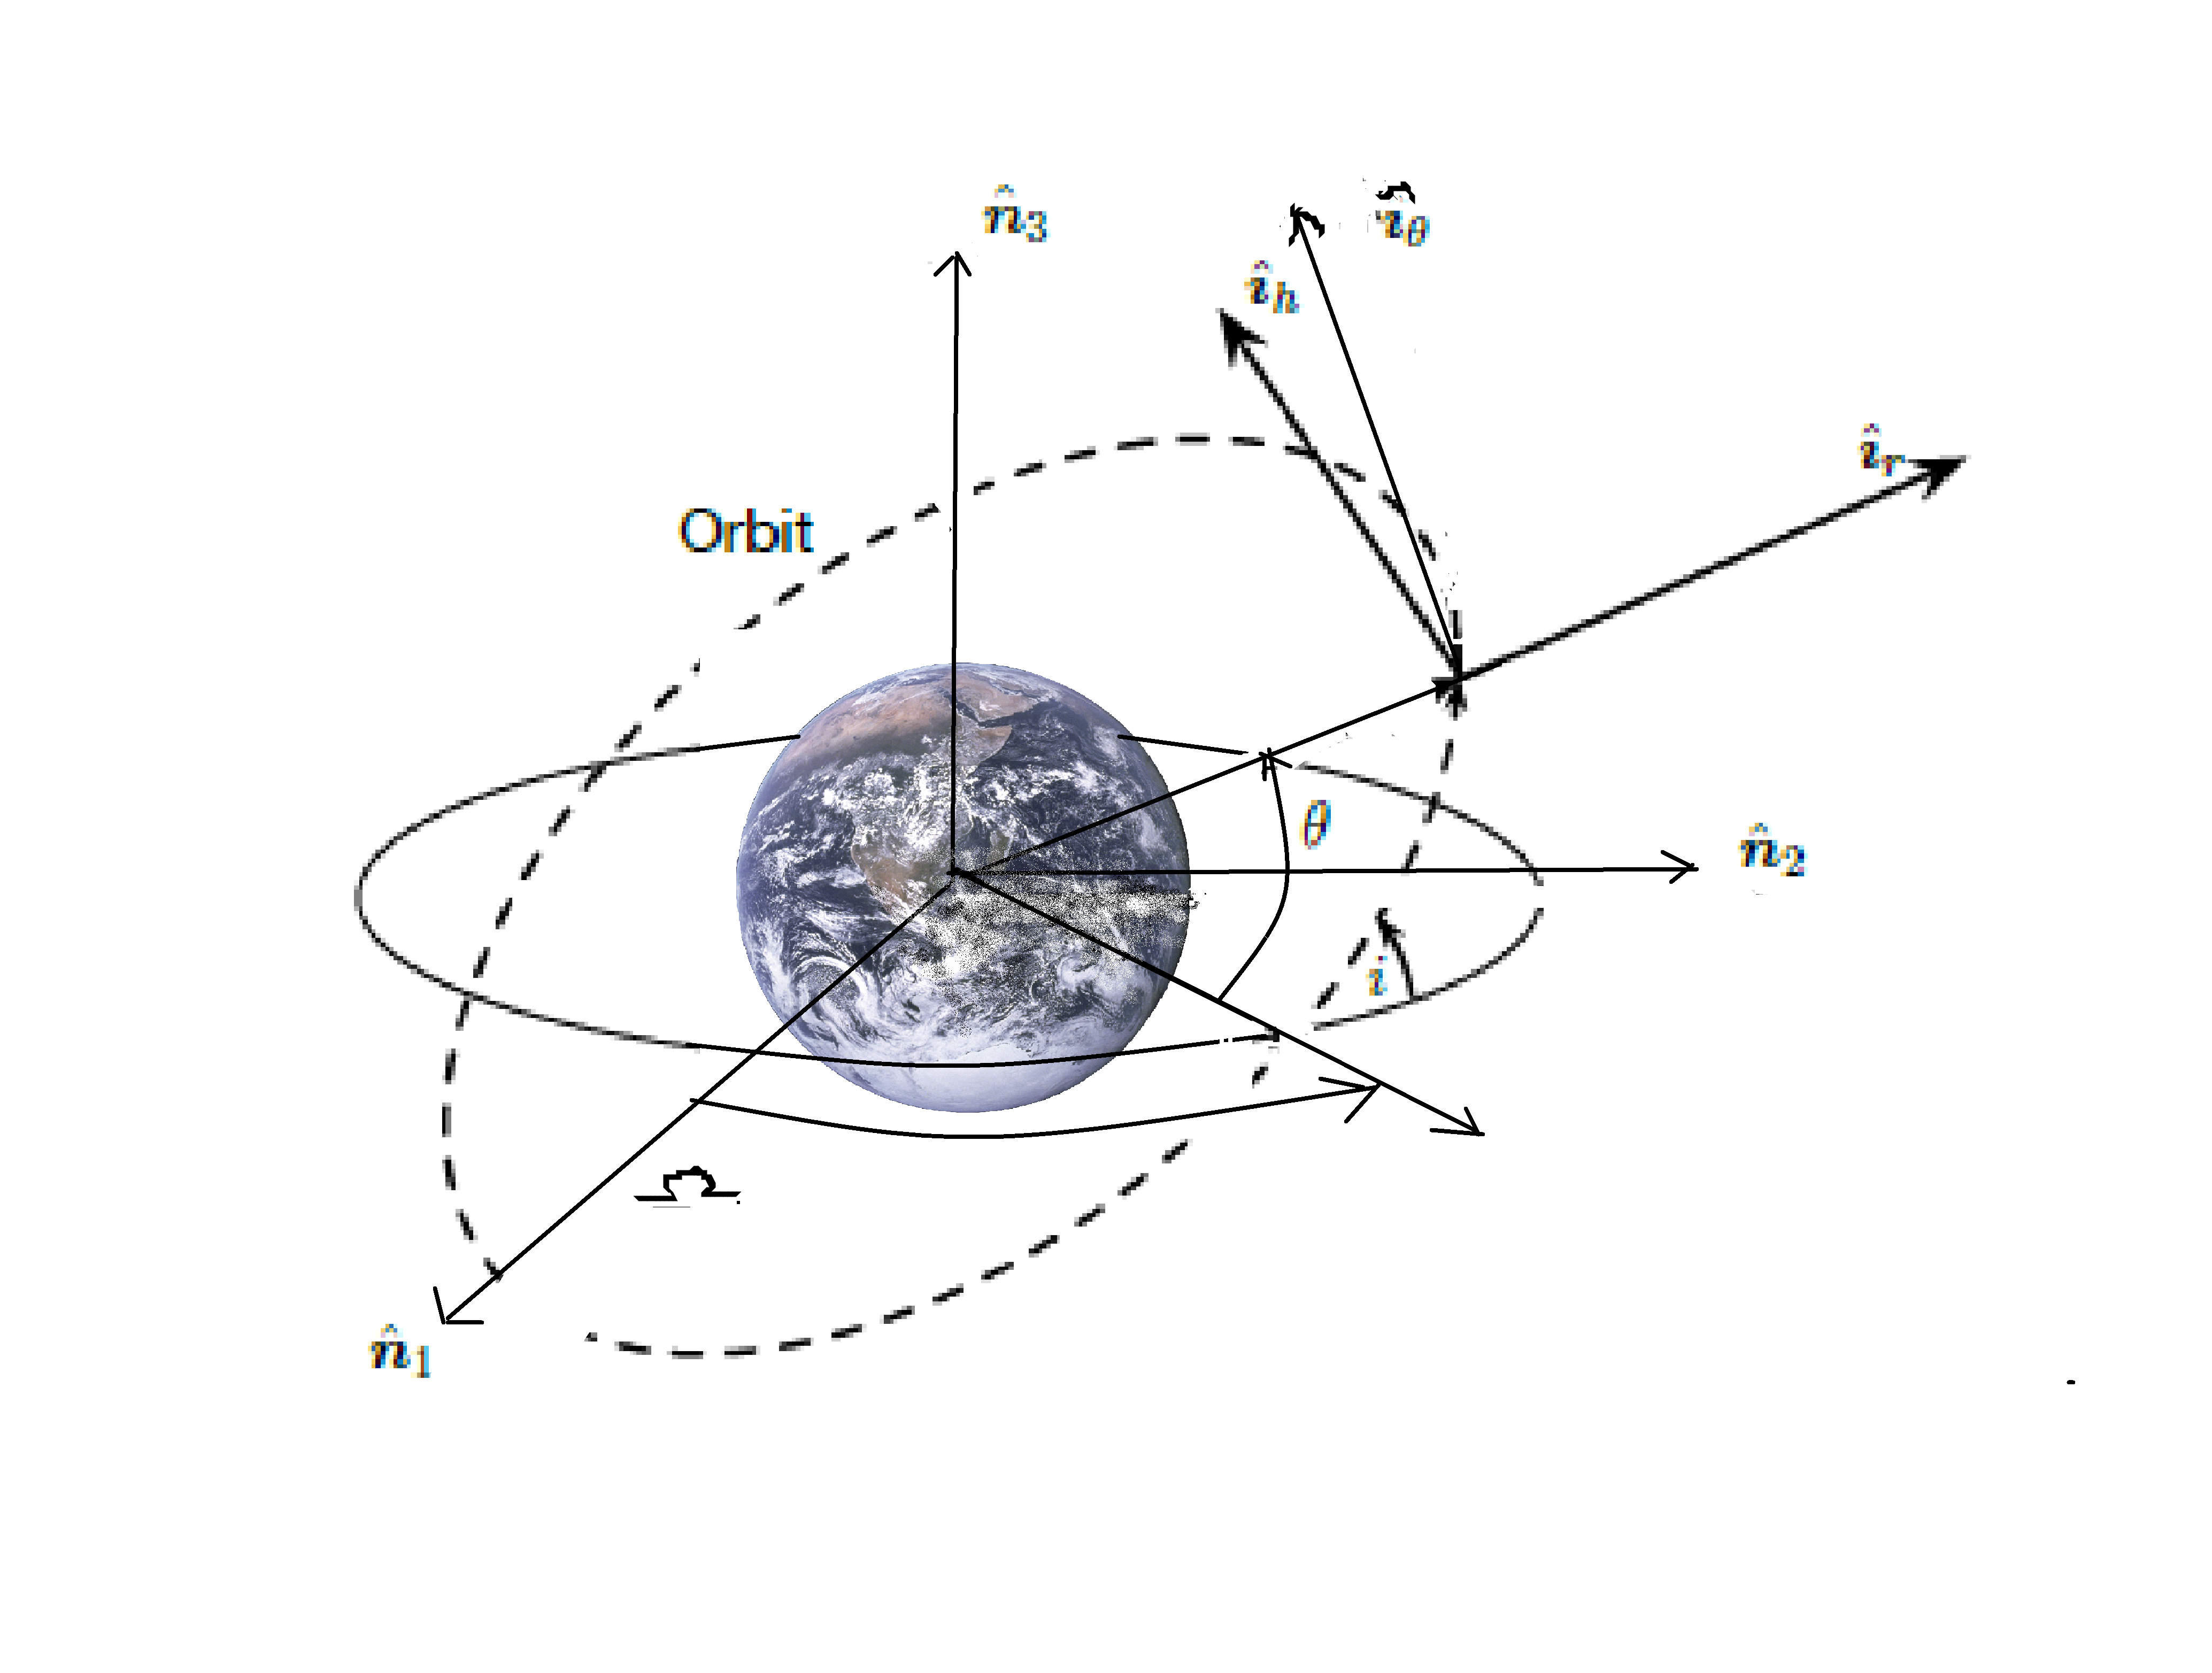

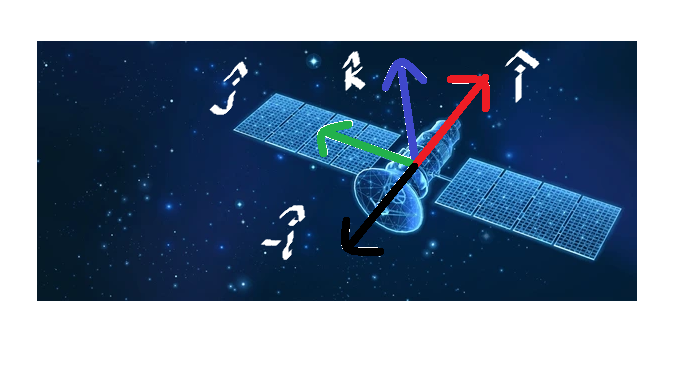

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# The radius of the Earth is 6,378 km

R_earth=6378*1000

In [4]:
# Mass of the earth is 

M_earth=5.97219*10**24

In [5]:
# Gravitational constant G

G=6.6743*10**-11

In [6]:
# Gravitational parameter of the Earth = G * m_Earth

mu=G*M_earth

Initial orbit parameters for lmo are 

1) Right ascention= Omega = 15 degrees
2) Inclination = i = 25 degrees
3) Lattitude = theta = 10 degrees
4) Argument of periapsis = 0 degrees

Since argument of periapsis is 0 degrees

5) True anamoly = Lattitude = theta

Initial angular velocity of spacecraft in body frame 

([[2], [1], [1.5]) deg/sec

Initial Modified Rodrigues Parameters are 

[0.2,0.3,0.4]
  
Moment of inertia tensor

I=np.array([[12,  0,  0],
            [ 0,  6,  0],
            [ 0,  0,  8]]) kgm^2 


In [7]:
# Orbit parameters

#The LMO (low mars orbit) semi-major axis

a=R_earth+500*1000
print('semi-major axis of lmo orbit is' , a, 'meters')

#The LMO (low mars orbit) essentricity

e=0.01

# angles

Omega=np.radians(15)
i=np.radians(25)
theta0=np.radians(10)

# semi-minor axis 

b=a*np.sqrt(1-e**2)
print('semi-minor axis of lmo orbit is' , b, 'meters')

# perigee distance from focus

dist_perigee=a*(1-e)
print('perigee distance of the lmo spacecraft from the centre of earth is ',dist_perigee, 'meters' )

# apogee distance from focus

dist_apogee=a*(1+e)
print('apogee distance  of the lmo spacecraft  from the centre of earth is ',dist_apogee, 'meters' )

# minimum distance of the spacecraft from the surface of mars

h_minimum=dist_perigee-R_earth
print('minimum distance of the lmo spacecraft from the surface of earth is ',h_minimum, 'meters' )

# maximum distance of the spacecraft from the surface of mars

h_maximum=dist_apogee-R_earth
print('maximum distance of the lmo spacecraft from the surface of earth is ',h_maximum, 'meters' )

# lmo period calculation

T=2*np.pi*np.sqrt(a**3/mu)

print('period of the orbit of lmo is', T, 'seconds')



semi-major axis of lmo orbit is 6878000 meters
semi-minor axis of lmo orbit is 6877656.091402071 meters
perigee distance of the lmo spacecraft from the centre of earth is  6809220.0 meters
apogee distance  of the lmo spacecraft  from the centre of earth is  6946780.0 meters
minimum distance of the lmo spacecraft from the surface of earth is  431220.0 meters
maximum distance of the lmo spacecraft from the surface of earth is  568780.0 meters
period of the orbit of lmo is 5676.798195593201 seconds


In [8]:
# Orbit_propogation of LMO

# specific angular momentum

h=np.sqrt(mu*a*(1-e**2))

# Initial mean anamoly calculation
    
E0=2 * np.arctan(np.sqrt((1 - e) / (1 + e)) * np.tan(theta0 / 2))
M0=E0-e*np.sin(E0)

# Mean motion calculation 

n = np.sqrt(mu / a**3)

# Kepler's equation

def kepler_solve(M, e, tol=1e-6):
    E = M 
    for _ in range(100):
        delta = (E - e * np.sin(E) - M) / (1 - e * np.cos(E))
        E -= delta
        if abs(delta) < tol:
            break
    return E

# inerial position and inertial velocity as function of time

r_inertial=[]
v_inertial=[]
theta_dot_lmo=[]
DCM_in_to_hill=[]
theta_dot_lmo_inertial=[]
theta_final=[]

t_final=6000

for t in range (t_final):
    M = M0 + n * t
    E=kepler_solve(M, e)
    
    theta = 2 * np.arctan(np.sqrt((1 + e) / (1 - e)) * np.tan(E / 2))
    theta_final.append(theta)
    
    r=(a * (1 - e**2)) / (1 + e * np.cos(theta))
    v_r=(mu/h)*e*np.sin(theta)
    v_t=(mu/h)*(1+e*np.cos(theta))
    theta_dot=h/r**2
    theta_dot_lmo.append(theta_dot)
    
    theta1=Omega
    theta2=i
    theta3=theta
  
    c1, s1 = np.cos(theta1), np.sin(theta1)
    c2, s2 = np.cos(theta2), np.sin(theta2)
    c3, s3 = np.cos(theta3), np.sin(theta3)
    
    DCM_hill_to_inertial= np.array([
        [ c1 * c3 - s1 * c2 * s3,  -c1 * s3 - s1 * c2 * c3,  s1 * s2],
        [ s1 * c3 + c1 * c2 * s3,  -s1 * s3 + c1 * c2 * c3, -c1 * s2],
        [ s2 * s3,                  s2 * c3,                c2]])
    
    DCM_inertial_to_hill=np.linalg.inv(DCM_hill_to_inertial)
    DCM_in_to_hill.append(DCM_inertial_to_hill)
    
    r_in=DCM_hill_to_inertial @ np.array([[r],[0],[0]])
    r_inertial.append(r_in)
    
    v_in=DCM_hill_to_inertial @ np.array([[v_r],[v_t],[0]])
    v_inertial.append(v_in)
    
    # theta dot lmo in inertial frame
    
   
    theta_dot_lmo_in=DCM_hill_to_inertial @ np.array([[0],[0],[theta_dot]])
    theta_dot_lmo_inertial.append(theta_dot_lmo_in)
    
  
    
r_inertial=np.array(r_inertial)
v_inertial=np.array(v_inertial)
theta_final=np.array(theta_final)
theta_dot_lmo=np.array(theta_dot_lmo)


In [9]:
# confirming minimum and maximum distance of the spacecraft from the surface of earth

norms = np.linalg.norm(r_inertial, axis=1)
norms = norms.reshape(t_final)

print('confirmation_minimum',np.min(norms)-R_earth )
print('confirmation_maximum',np.max(norms)-R_earth)

confirmation_minimum 431220.00215911213
confirmation_maximum 568779.9987355275


In [10]:
# minimum and maximum velocities of the spacecraft

norms = np.linalg.norm(v_inertial, axis=1)
norms = norms.reshape(t_final)

print('minimum velocity of spacecraft',np.min(norms),'m/s' )
print('maximum velocity of spacecraft',np.max(norms),'m/s' )

minimum velocity of spacecraft 7536.947576970155 m/s
maximum velocity of spacecraft 7689.209140353922 m/s


In [11]:
# extracting inertial coordinates of lmo

x_inertial_lmo = r_inertial[:, 0, 0]  
y_inertial_lmo = r_inertial[:, 1, 0]  
z_inertial_lmo = r_inertial[:, 2, 0] 



In [12]:
# The time when lmo crosses to dark side of earth is when theta becomes 180 degrees

np.degrees(theta_final[2683])

179.94871384904934

In [13]:
# orbit parameters of gmo

# Calculation of gmo distance from the centre of earth

period_earth=24*3600
theta_dot_gmo=(2*np.pi)/period_earth
r_gmo=(mu/(theta_dot_gmo)**2)**(1/3)
print('theta_dot_gmo is ' , theta_dot_gmo)
print('r_gmo is' , r_gmo)
print('period of gmo is ', period_earth, 'seconds')

# angles gmo

theta_gmo0=np.radians(300)

# height of gmo from the surface of earth

h_gmo=r_gmo-R_earth
print('height of gmo from the surface of earth is', h_gmo,'meters')

theta_dot_gmo is  7.27220521664304e-05
r_gmo is 42241146.377938256
period of gmo is  86400 seconds
height of gmo from the surface of earth is 35863146.377938256 meters


In [14]:
# orbit propogation of GMO

x_inertial_gmo=[]
y_inertial_gmo=[]

for t in range (t_final):
    theta_gmo=theta_gmo0+theta_dot_gmo*t
    x_in_gmo=r_gmo*np.cos(theta_gmo)
    y_in_gmo=r_gmo*np.sin(theta_gmo)
    
    x_inertial_gmo.append(x_in_gmo)
    y_inertial_gmo.append(y_in_gmo)


In [15]:
x_inertial_gmo=np.array(x_inertial_gmo)
y_inertial_gmo=np.array(y_inertial_gmo)
z_inertial_gmo=np.zeros(86401)

Attitude dynamics

In [16]:
# function to calculate modified rodrigues parameters from direction cosine matrix

def mrp_from_dcm(dcm):
    
    eta=np.sqrt(np.trace(dcm)+1)
    
    if eta == 0:
        
        eigvals, eigvecs = np.linalg.eig(dcm)
        rotation_axis = eigvecs[:, np.isclose(eigvals, 1)].flatten()
        sigma = np.array(rotation_axis / np.linalg.norm(rotation_axis))
        sigma1=sigma[0]
        sigma2=sigma[1]
        sigma3=sigma[2]
        
    else:
        
        multiplier=1/(eta*(eta+2))
        sigma1=multiplier*(dcm[1,2]-dcm[2,1])
        sigma2=multiplier*(dcm[2,0]-dcm[0,2])
        sigma3=multiplier*(dcm[0,1]-dcm[1,0])
        norm=np.linalg.norm(np.array([sigma1,sigma2,sigma3]))
        
        if norm > 1:
            sigma1=(-sigma1)/norm**2
            sigma2=(-sigma2)/norm**2
            sigma3=(-sigma3)/norm**2
    
    return np.array([sigma1,sigma2,sigma3])
    

In [17]:
# function to calculate direction cosine matrix from given modified rodrigues parameters

def dcm_from_mrp(sigma):
    
    sigma1=sigma[0]
    sigma2=sigma[1]
    sigma3=sigma[2]
    norm=np.linalg.norm(np.array([sigma1,sigma2,sigma3]))
    
    if norm > 1:
        sigma1=(-sigma1)/norm**2
        sigma2=(-sigma2)/norm**2
        sigma3=(-sigma3)/norm**2
        
    sigma_squared=sigma1**2+sigma2**2+sigma3**2
    
    sigma_telda=np.array([
        [0,  -sigma3,  sigma2],
        [sigma3,  0,  -sigma1],
        [ -sigma2,  sigma1,  0]])
    
    sigma_telda_squared=sigma_telda @ sigma_telda
    
    DCM=np.eye(3)+(8* sigma_telda_squared-4*(1-sigma_squared)*sigma_telda)/((1+sigma_squared)**2)
    
    return (DCM)
    

In [18]:
# sun-pointing reference frame

def sun_pointing (t):
    
    DCM_inertial_to_sun=np.array([
        [-1,  0,  0],
        [ 0,  0,  1],
        [ 0,  1,  0]])
    
    sigma_sun=mrp_from_dcm(DCM_inertial_to_sun)
    
    return (sigma_sun)

In [19]:
# hill frame

def hill(t):
    
    sigma_hill = mrp_from_dcm(DCM_in_to_hill[t])
    
    return sigma_hill
    

In [20]:
# nadir-pointing reference frame

def nadir_pointing (t):
    
    DCM_hill_to_nadir=np.array([
        [-1,  0,  0],
        [ 0,  1,  0],
        [ 0,  0,  -1]])
    
    DCM_inertial_to_nadir=DCM_hill_to_nadir @ DCM_in_to_hill[t]
    
    sigma_nadir = mrp_from_dcm(DCM_inertial_to_nadir)
    
    return sigma_nadir
    


In [21]:
# gmo_pointing_reference frame

r1_gmo_pointing=[]
r2_gmo_pointing=[]
r3_gmo_pointing=[]
DCM_ig=[]

def gmo_pointing(t):
    
    # r1
    
    delta_r_x = x_inertial_gmo[t] - x_inertial_lmo[t]
    delta_r_y = y_inertial_gmo[t] - y_inertial_lmo[t]
    delta_r_z = -z_inertial_lmo[t]
    delta_r_norm = np.linalg.norm(np.array([delta_r_x, delta_r_y, delta_r_z ]))
    r1=np.array([-delta_r_x/delta_r_norm, -delta_r_y/delta_r_norm , -delta_r_z/delta_r_norm])
    r1_gmo_pointing.append(r1)
    
    # r2
    
    term1=y_inertial_gmo[t]-y_inertial_lmo[t]
    term2=x_inertial_lmo[t]-x_inertial_gmo[t]
    term3=np.linalg.norm(np.array([term1, term2]))
    r2=np.array([(term1)/(term3),(term2)/(term3),0])
    r2_gmo_pointing.append(r2)
    
    # r3
    
    r3=np.cross(r1,r2)
    r3_gmo_pointing.append(r3)
    
    # direction cosine matrix from body to inertial 
    
    DCM_body_to_inertial=np.array([[r1[0],   r1[1] , r1[2]],
                                   [r2[0],   r2[1],      0],
                                   [r3[0],   r3[1],  r3[2]]])
    
    
    
    DCM_inertial_to_body=np.linalg.inv(DCM_body_to_inertial)
    
    sigma_gmo = mrp_from_dcm(DCM_inertial_to_body)
    
    return (sigma_gmo)
    
  


In [22]:
# angular velocity of lmo with repsect to gmo 

def relative_omega(t):
    
    # relative omega in inertial frame
    
    omega_gmo_inertial = np.array([[0],[0],[theta_dot_gmo]])
    
    omega_lmo_inertial = theta_dot_lmo_inertial[t]
    
    relative_omega_in_inertial_frame = omega_lmo_inertial - omega_gmo_inertial
    
    
    # relative omega in body frame
    
    sigma_gmo = gmo_pointing(t)
    
    DCM_i_to_b=dcm_from_mrp(sigma_gmo)
    
    relative_omega_in_body_frame = DCM_i_to_b @ relative_omega_in_inertial_frame

    return (relative_omega_in_body_frame.flatten())



In [23]:
def error_tracking(sigma_current, w_current,t):
    
    # sigma error with respect to sun pointing 
    
    sigma_error_wrt_sun = sigma_current - sun_pointing (t)
    
    # sigma error with respect to nadir pointing
    
    sigma_error_wrt_nadir = sigma_current - nadir_pointing (t) 
  
     # sigma error with respect to gmo pointing
    
    sigma_error_wrt_gmo = sigma_current - gmo_pointing(t)
    
    
    
    
    # omega error with respect to sun pointing
    
    omega_sun_frame = 0
    w_error_wrt_sun = w_current - omega_sun_frame
    
     # omega error with respect to nadir pointing
        
    omega_nadir_frame = np.array([0, 0, -theta_dot_lmo[t]])
    w_error_wrt_nadir = w_current - omega_nadir_frame 
    
    # omega error with respect to gmo pointing
    
    omega_gmo_frame = relative_omega(t)
    w_error_wrt_gmo = w_current - omega_gmo_frame 
    
    
    return (sigma_error_wrt_sun,sigma_error_wrt_nadir,sigma_error_wrt_gmo,w_error_wrt_sun, w_error_wrt_nadir, w_error_wrt_gmo)    
    

In [24]:
#  Attitude dynamics without torque

# moment of inertia tensor

I=np.array([[12,  0,  0],
            [ 0,  6,  0],
            [ 0,  0,  8]])

Ixx=I[0,0]
Iyy=I[1,1]
Izz=I[2,2]

# initial angular velocity of satellite in body frame

w = np.radians(np.array([2, 1, 1.5]))

w1=w[0]
w2=w[1]
w3=w[2]

# initial mrps of satellite

sigma = np.array([0.2,0.3,0.4])

sigma1=sigma[0]
sigma2=sigma[1]
sigma3=sigma[2]

# Torque

L=np.array([0,0,0])

L1=L[0]
L2=L[1]
L3=L[2]

# calculating derivatives

def derivatives(sigma1, sigma2, sigma3, w1, w2, w3, Ixx, Iyy, Izz, L1, L2, L3):
    
    sigma1_dot=1/4*((1-sigma1**2-sigma2**2-sigma3**2+2*sigma1**2)*w1 + 2*(sigma1*sigma2-sigma3)*w2 + 2*(sigma1*sigma3+sigma2)*w3)
    sigma2_dot=1/4*(2*(sigma1*sigma2+sigma3)*w1 + (1-sigma1**2-sigma2**2-sigma3**2+2*sigma2**2)*w2 + 2*(sigma2*sigma3-sigma1)*w3)
    sigma3_dot=1/4*(2*(sigma1*sigma3-sigma2)*w1 + 2*(sigma2*sigma3+sigma1)*w2 + (1-sigma1**2-sigma2**2-sigma3**2+2*sigma3**2)*w3)
    
    w1_dot = L1 - ((Izz-Iyy)/(Ixx))*w2*w3
    w2_dot = L2 - ((Ixx-Izz)/(Iyy))*w3*w1
    w3_dot = L3 - ((Iyy-Ixx)/(Izz))*w1*w2
    
    return (sigma1_dot,sigma2_dot,sigma3_dot, w1_dot,w2_dot,w3_dot)



# Runge-Kutta 4
 
# time-step

h=1

# final time 

t_final=6000

# appending values 

sigma_propogation=[]
sigma_propogation.append(sigma)

w_propogation=[]
w_propogation.append(w)

for t in range(1, t_final):
    
    # k1
    
    k1_sigma1=derivatives(sigma1, sigma2, sigma3, w1, w2, w3, Ixx, Iyy, Izz, L1, L2, L3)[0]
    k1_sigma2=derivatives(sigma1, sigma2, sigma3, w1, w2, w3, Ixx, Iyy, Izz, L1, L2, L3)[1]
    k1_sigma3=derivatives(sigma1, sigma2, sigma3, w1, w2, w3, Ixx, Iyy, Izz, L1, L2, L3)[2]
    k1_w1=derivatives(sigma1, sigma2, sigma3, w1, w2, w3, Ixx, Iyy, Izz, L1, L2, L3)[3]
    k1_w2=derivatives(sigma1, sigma2, sigma3, w1, w2, w3, Ixx, Iyy, Izz, L1, L2, L3)[4]
    k1_w3=derivatives(sigma1, sigma2, sigma3, w1, w2, w3, Ixx, Iyy, Izz, L1, L2, L3)[5]
    
    # k2
    
    k2_sigma1=derivatives(sigma1+(h/2)*k1_sigma1, sigma2+(h/2)*k1_sigma2, sigma3+(h/2)*k1_sigma3, w1+(h/2)*k1_w1, w2+(h/2)*k1_w2, w3+(h/2)*k1_w3, Ixx, Iyy, Izz, L1, L2, L3)[0]
    k2_sigma2=derivatives(sigma1+(h/2)*k1_sigma1, sigma2+(h/2)*k1_sigma2, sigma3+(h/2)*k1_sigma3, w1+(h/2)*k1_w1, w2+(h/2)*k1_w2, w3+(h/2)*k1_w3, Ixx, Iyy, Izz, L1, L2, L3)[1]
    k2_sigma3=derivatives(sigma1+(h/2)*k1_sigma1, sigma2+(h/2)*k1_sigma2, sigma3+(h/2)*k1_sigma3, w1+(h/2)*k1_w1, w2+(h/2)*k1_w2, w3+(h/2)*k1_w3, Ixx, Iyy, Izz, L1, L2, L3)[2]
    k2_w1=derivatives(sigma1+(h/2)*k1_sigma1, sigma2+(h/2)*k1_sigma2, sigma3+(h/2)*k1_sigma3, w1+(h/2)*k1_w1, w2+(h/2)*k1_w2, w3+(h/2)*k1_w3, Ixx, Iyy, Izz, L1, L2, L3)[3]
    k2_w2=derivatives(sigma1+(h/2)*k1_sigma1, sigma2+(h/2)*k1_sigma2, sigma3+(h/2)*k1_sigma3, w1+(h/2)*k1_w1, w2+(h/2)*k1_w2, w3+(h/2)*k1_w3, Ixx, Iyy, Izz, L1, L2, L3)[4]
    k2_w3=derivatives(sigma1+(h/2)*k1_sigma1, sigma2+(h/2)*k1_sigma2, sigma3+(h/2)*k1_sigma3, w1+(h/2)*k1_w1, w2+(h/2)*k1_w2, w3+(h/2)*k1_w3, Ixx, Iyy, Izz, L1, L2, L3)[5]
    
    # k3
    
    k3_sigma1=derivatives(sigma1+(h/2)*k2_sigma1, sigma2+(h/2)*k2_sigma2, sigma3+(h/2)*k2_sigma3, w1+(h/2)*k2_w1, w2+(h/2)*k2_w2, w3+(h/2)*k2_w3, Ixx, Iyy, Izz, L1, L2, L3)[0]
    k3_sigma2=derivatives(sigma1+(h/2)*k2_sigma1, sigma2+(h/2)*k2_sigma2, sigma3+(h/2)*k2_sigma3, w1+(h/2)*k2_w1, w2+(h/2)*k2_w2, w3+(h/2)*k2_w3, Ixx, Iyy, Izz, L1, L2, L3)[1]
    k3_sigma3=derivatives(sigma1+(h/2)*k2_sigma1, sigma2+(h/2)*k2_sigma2, sigma3+(h/2)*k2_sigma3, w1+(h/2)*k2_w1, w2+(h/2)*k2_w2, w3+(h/2)*k2_w3, Ixx, Iyy, Izz, L1, L2, L3)[2]
    k3_w1=derivatives(sigma1+(h/2)*k2_sigma1, sigma2+(h/2)*k2_sigma2, sigma3+(h/2)*k2_sigma3, w1+(h/2)*k2_w1, w2+(h/2)*k2_w2, w3+(h/2)*k2_w3, Ixx, Iyy, Izz, L1, L2, L3)[3]
    k3_w2=derivatives(sigma1+(h/2)*k2_sigma1, sigma2+(h/2)*k2_sigma2, sigma3+(h/2)*k2_sigma3, w1+(h/2)*k2_w1, w2+(h/2)*k2_w2, w3+(h/2)*k2_w3, Ixx, Iyy, Izz, L1, L2, L3)[4]
    k3_w3=derivatives(sigma1+(h/2)*k2_sigma1, sigma2+(h/2)*k2_sigma2, sigma3+(h/2)*k2_sigma3, w1+(h/2)*k2_w1, w2+(h/2)*k2_w2, w3+(h/2)*k2_w3, Ixx, Iyy, Izz, L1, L2, L3)[5]
    
    # k4
    
    k4_sigma1=derivatives(sigma1+(h)*k3_sigma1, sigma2+(h)*k3_sigma2, sigma3+(h)*k3_sigma3, w1+(h)*k3_w1, w2+(h)*k3_w2, w3+(h)*k3_w3, Ixx, Iyy, Izz, L1, L2, L3)[0]
    k4_sigma2=derivatives(sigma1+(h)*k3_sigma1, sigma2+(h)*k3_sigma2, sigma3+(h)*k3_sigma3, w1+(h)*k3_w1, w2+(h)*k3_w2, w3+(h)*k3_w3, Ixx, Iyy, Izz, L1, L2, L3)[1]
    k4_sigma3=derivatives(sigma1+(h)*k3_sigma1, sigma2+(h)*k3_sigma2, sigma3+(h)*k3_sigma3, w1+(h)*k3_w1, w2+(h)*k3_w2, w3+(h)*k3_w3, Ixx, Iyy, Izz, L1, L2, L3)[2]
    k4_w1=derivatives(sigma1+(h)*k3_sigma1, sigma2+(h)*k3_sigma2, sigma3+(h)*k3_sigma3, w1+(h)*k3_w1, w2+(h)*k3_w2, w3+(h)*k3_w3, Ixx, Iyy, Izz, L1, L2, L3)[3]
    k4_w2=derivatives(sigma1+(h)*k3_sigma1, sigma2+(h)*k3_sigma2, sigma3+(h)*k3_sigma3, w1+(h)*k3_w1, w2+(h)*k3_w2, w3+(h)*k3_w3, Ixx, Iyy, Izz, L1, L2, L3)[4]
    k4_w3=derivatives(sigma1+(h)*k3_sigma1, sigma2+(h)*k3_sigma2, sigma3+(h)*k3_sigma3, w1+(h)*k3_w1, w2+(h)*k3_w2, w3+(h)*k3_w3, Ixx, Iyy, Izz, L1, L2, L3)[5]
    
    
    sigma1=sigma1+(1/6)*(k1_sigma1+2*k2_sigma1+2*k3_sigma1+k4_sigma1)
    sigma2=sigma2+(1/6)*(k1_sigma2+2*k2_sigma2+2*k3_sigma2+k4_sigma2)
    sigma3=sigma3+(1/6)*(k1_sigma3+2*k2_sigma3+2*k3_sigma3+k4_sigma3)
    w1=w1+(1/6)*(k1_w1+2*k2_w1+2*k3_w1+k4_w1)
    w2=w2+(1/6)*(k1_w2+2*k2_w2+2*k3_w2+k4_w2)
    w3=w3+(1/6)*(k1_w3+2*k2_w3+2*k3_w3+k4_w3)
    
    norm=np.linalg.norm(np.array([sigma1,sigma2,sigma3]))
    
    if norm > 1:
        sigma1=(-sigma1)/norm**2
        sigma2=(-sigma2)/norm**2
        sigma3=(-sigma3)/norm**2
    
    sigma_propogation.append(np.array([sigma1,sigma2,sigma3]))
    w_propogation.append(np.array([w1,w2,w3]))
    

    

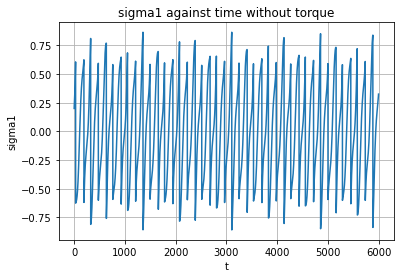

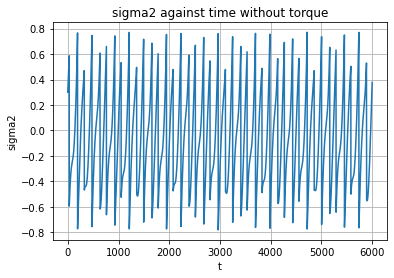

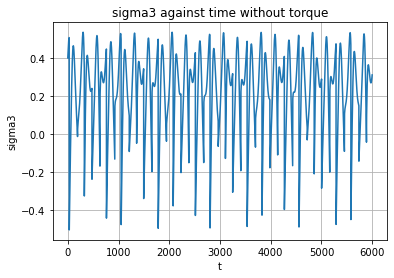

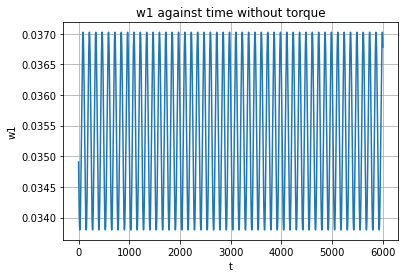

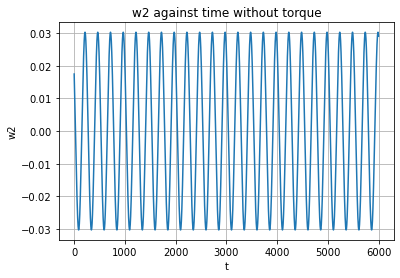

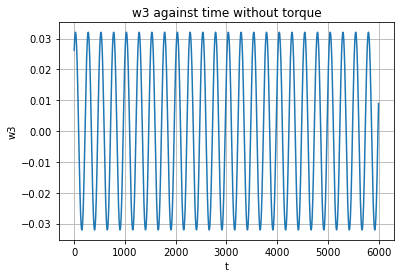

In [25]:
 # Plotting sigma propogation and omega propogation without torque

t=np.arange(0, t_final, 1)

fig1 = plt.figure
plt.plot(t, np.array(sigma_propogation)[:,0])
plt.xlabel("t")
plt.ylabel("sigma1")
plt.title("sigma1 against time without torque")
plt.grid()
plt.show()

fig2 = plt.figure
plt.plot(t, np.array(sigma_propogation)[:,1])
plt.xlabel("t")
plt.ylabel("sigma2")
plt.title("sigma2 against time without torque")
plt.grid()
plt.show()

fig3 = plt.figure
plt.plot(t, np.array(sigma_propogation)[:,2])
plt.xlabel("t")
plt.ylabel("sigma3")
plt.title("sigma3 against time without torque")
plt.grid()
plt.show()

fig4 = plt.figure
plt.plot(t, np.array(w_propogation)[:,0])
plt.xlabel("t")
plt.ylabel("w1")
plt.title("w1 against time without torque")
plt.grid()
plt.show()

fig5 = plt.figure
plt.plot(t, np.array(w_propogation)[:,1])
plt.xlabel("t")
plt.ylabel("w2")
plt.title("w2 against time without torque")
plt.grid()
plt.show()

fig6 = plt.figure
plt.plot(t, np.array(w_propogation)[:,2])
plt.xlabel("t")
plt.ylabel("w3")
plt.title("w3 against time without torque")
plt.grid()
plt.show()



In [26]:
def derivatives(sigma1, sigma2, sigma3, w1, w2, w3, Ixx, Iyy, Izz, L1, L2, L3):
    
    sigma1_dot=1/4*((1-sigma1**2-sigma2**2-sigma3**2+2*sigma1**2)*w1 + 2*(sigma1*sigma2-sigma3)*w2 + 2*(sigma1*sigma3+sigma2)*w3)
    sigma2_dot=1/4*(2*(sigma1*sigma2+sigma3)*w1 + (1-sigma1**2-sigma2**2-sigma3**2+2*sigma2**2)*w2 + 2*(sigma2*sigma3-sigma1)*w3)
    sigma3_dot=1/4*(2*(sigma1*sigma3-sigma2)*w1 + 2*(sigma2*sigma3+sigma1)*w2 + (1-sigma1**2-sigma2**2-sigma3**2+2*sigma3**2)*w3)
    
    w1_dot = L1 - ((Izz-Iyy)/(Ixx))*w2*w3
    w2_dot = L2 - ((Ixx-Izz)/(Iyy))*w3*w1
    w3_dot = L3 - ((Iyy-Ixx)/(Izz))*w1*w2
    
    return (sigma1_dot,sigma2_dot,sigma3_dot, w1_dot,w2_dot,w3_dot)



In [27]:
# control for sun pointing, nadir pointing and gmo pointing

# moment of inertia tensor

I=np.array([[12,  0,  0],
            [ 0,  6,  0],
            [ 0,  0,  8]])

Ixx=I[0,0]
Iyy=I[1,1]
Izz=I[2,2]

# initial angular velocity of satellite in body frame

w = np.radians(np.array([2, 1, 1.5]))

w1=w[0]
w2=w[1]
w3=w[2]

# initial mrps of satellite

sigma = np.array([0.2, 0.3, 0.4])

sigma1=sigma[0]
sigma2=sigma[1]
sigma3=sigma[2]

# initial torque

K1=0.01
K2=0.00014
K3=0.005
P1=0.12
P2=0.052
P3=0.072

error=error_tracking(np.array([sigma1, sigma2, sigma3]),np.array([w1, w2, w3]),0)

L1=-K1*error[0][0]-P1*error[3][0]
L2=-K2*error[0][1]-P2*error[3][1]
L3=-K3*error[0][2]-P3*error[3][2]

# appending initial values 

sigma_propogation=[]
sigma_propogation.append(sigma)

w_propogation=[]
w_propogation.append(w)

L_propogation=[]
L_propogation.append(np.array([L1, L2, L3]))

time_propogation=[]
time_propogation.append(0)

# Runge-Kutta 4                                                                                                                                                                                                           

# time-step

h=1

# final time 

t_final=6000

for t in range(1, t_final):
    
    # k1
    
    k1_sigma1=derivatives(sigma1, sigma2, sigma3, w1, w2, w3, Ixx, Iyy, Izz, L1, L2, L3)[0]
    k1_sigma2=derivatives(sigma1, sigma2, sigma3, w1, w2, w3, Ixx, Iyy, Izz, L1, L2, L3)[1]
    k1_sigma3=derivatives(sigma1, sigma2, sigma3, w1, w2, w3, Ixx, Iyy, Izz, L1, L2, L3)[2]
    k1_w1=derivatives(sigma1, sigma2, sigma3, w1, w2, w3, Ixx, Iyy, Izz, L1, L2, L3)[3]
    k1_w2=derivatives(sigma1, sigma2, sigma3, w1, w2, w3, Ixx, Iyy, Izz, L1, L2, L3)[4]
    k1_w3=derivatives(sigma1, sigma2, sigma3, w1, w2, w3, Ixx, Iyy, Izz, L1, L2, L3)[5]
    
    # k2
    
    k2_sigma1=derivatives(sigma1+(h/2)*k1_sigma1, sigma2+(h/2)*k1_sigma2, sigma3+(h/2)*k1_sigma3, w1+(h/2)*k1_w1, w2+(h/2)*k1_w2, w3+(h/2)*k1_w3, Ixx, Iyy, Izz, L1, L2, L3)[0]
    k2_sigma2=derivatives(sigma1+(h/2)*k1_sigma1, sigma2+(h/2)*k1_sigma2, sigma3+(h/2)*k1_sigma3, w1+(h/2)*k1_w1, w2+(h/2)*k1_w2, w3+(h/2)*k1_w3, Ixx, Iyy, Izz, L1, L2, L3)[1]
    k2_sigma3=derivatives(sigma1+(h/2)*k1_sigma1, sigma2+(h/2)*k1_sigma2, sigma3+(h/2)*k1_sigma3, w1+(h/2)*k1_w1, w2+(h/2)*k1_w2, w3+(h/2)*k1_w3, Ixx, Iyy, Izz, L1, L2, L3)[2]
    k2_w1=derivatives(sigma1+(h/2)*k1_sigma1, sigma2+(h/2)*k1_sigma2, sigma3+(h/2)*k1_sigma3, w1+(h/2)*k1_w1, w2+(h/2)*k1_w2, w3+(h/2)*k1_w3, Ixx, Iyy, Izz, L1, L2, L3)[3]
    k2_w2=derivatives(sigma1+(h/2)*k1_sigma1, sigma2+(h/2)*k1_sigma2, sigma3+(h/2)*k1_sigma3, w1+(h/2)*k1_w1, w2+(h/2)*k1_w2, w3+(h/2)*k1_w3, Ixx, Iyy, Izz, L1, L2, L3)[4]
    k2_w3=derivatives(sigma1+(h/2)*k1_sigma1, sigma2+(h/2)*k1_sigma2, sigma3+(h/2)*k1_sigma3, w1+(h/2)*k1_w1, w2+(h/2)*k1_w2, w3+(h/2)*k1_w3, Ixx, Iyy, Izz, L1, L2, L3)[5]
    
    # k3
    
    k3_sigma1=derivatives(sigma1+(h/2)*k2_sigma1, sigma2+(h/2)*k2_sigma2, sigma3+(h/2)*k2_sigma3, w1+(h/2)*k2_w1, w2+(h/2)*k2_w2, w3+(h/2)*k2_w3, Ixx, Iyy, Izz, L1, L2, L3)[0]
    k3_sigma2=derivatives(sigma1+(h/2)*k2_sigma1, sigma2+(h/2)*k2_sigma2, sigma3+(h/2)*k2_sigma3, w1+(h/2)*k2_w1, w2+(h/2)*k2_w2, w3+(h/2)*k2_w3, Ixx, Iyy, Izz, L1, L2, L3)[1]
    k3_sigma3=derivatives(sigma1+(h/2)*k2_sigma1, sigma2+(h/2)*k2_sigma2, sigma3+(h/2)*k2_sigma3, w1+(h/2)*k2_w1, w2+(h/2)*k2_w2, w3+(h/2)*k2_w3, Ixx, Iyy, Izz, L1, L2, L3)[2]
    k3_w1=derivatives(sigma1+(h/2)*k2_sigma1, sigma2+(h/2)*k2_sigma2, sigma3+(h/2)*k2_sigma3, w1+(h/2)*k2_w1, w2+(h/2)*k2_w2, w3+(h/2)*k2_w3, Ixx, Iyy, Izz, L1, L2, L3)[3]
    k3_w2=derivatives(sigma1+(h/2)*k2_sigma1, sigma2+(h/2)*k2_sigma2, sigma3+(h/2)*k2_sigma3, w1+(h/2)*k2_w1, w2+(h/2)*k2_w2, w3+(h/2)*k2_w3, Ixx, Iyy, Izz, L1, L2, L3)[4]
    k3_w3=derivatives(sigma1+(h/2)*k2_sigma1, sigma2+(h/2)*k2_sigma2, sigma3+(h/2)*k2_sigma3, w1+(h/2)*k2_w1, w2+(h/2)*k2_w2, w3+(h/2)*k2_w3, Ixx, Iyy, Izz, L1, L2, L3)[5]
    
    # k4
    
    k4_sigma1=derivatives(sigma1+(h)*k3_sigma1, sigma2+(h)*k3_sigma2, sigma3+(h)*k3_sigma3, w1+(h)*k3_w1, w2+(h)*k3_w2, w3+(h)*k3_w3, Ixx, Iyy, Izz, L1, L2, L3)[0]
    k4_sigma2=derivatives(sigma1+(h)*k3_sigma1, sigma2+(h)*k3_sigma2, sigma3+(h)*k3_sigma3, w1+(h)*k3_w1, w2+(h)*k3_w2, w3+(h)*k3_w3, Ixx, Iyy, Izz, L1, L2, L3)[1]
    k4_sigma3=derivatives(sigma1+(h)*k3_sigma1, sigma2+(h)*k3_sigma2, sigma3+(h)*k3_sigma3, w1+(h)*k3_w1, w2+(h)*k3_w2, w3+(h)*k3_w3, Ixx, Iyy, Izz, L1, L2, L3)[2]
    k4_w1=derivatives(sigma1+(h)*k3_sigma1, sigma2+(h)*k3_sigma2, sigma3+(h)*k3_sigma3, w1+(h)*k3_w1, w2+(h)*k3_w2, w3+(h)*k3_w3, Ixx, Iyy, Izz, L1, L2, L3)[3]
    k4_w2=derivatives(sigma1+(h)*k3_sigma1, sigma2+(h)*k3_sigma2, sigma3+(h)*k3_sigma3, w1+(h)*k3_w1, w2+(h)*k3_w2, w3+(h)*k3_w3, Ixx, Iyy, Izz, L1, L2, L3)[4]
    k4_w3=derivatives(sigma1+(h)*k3_sigma1, sigma2+(h)*k3_sigma2, sigma3+(h)*k3_sigma3, w1+(h)*k3_w1, w2+(h)*k3_w2, w3+(h)*k3_w3, Ixx, Iyy, Izz, L1, L2, L3)[5]
    
    
    # updated values
    
    sigma1=sigma1+(1/6)*(k1_sigma1+2*k2_sigma1+2*k3_sigma1+k4_sigma1)
    sigma2=sigma2+(1/6)*(k1_sigma2+2*k2_sigma2+2*k3_sigma2+k4_sigma2)
    sigma3=sigma3+(1/6)*(k1_sigma3+2*k2_sigma3+2*k3_sigma3+k4_sigma3)
    w1=w1+(1/6)*(k1_w1+2*k2_w1+2*k3_w1+k4_w1)
    w2=w2+(1/6)*(k1_w2+2*k2_w2+2*k3_w2+k4_w2)
    w3=w3+(1/6)*(k1_w3+2*k2_w3+2*k3_w3+k4_w3)
    
    # calculating norm of sigma
    
    norm=np.linalg.norm(np.array([sigma1,sigma2,sigma3]))
    
    # transforming to shadow set if norm > 1 
    
    if norm > 1:
        sigma1=(-sigma1)/norm**2
        sigma2=(-sigma2)/norm**2
        sigma3=(-sigma3)/norm**2
                     
    # updating torque for sun pointing
                     
    if t<=2683:
        
        error=error_tracking(np.array([sigma1, sigma2, sigma3]),np.array([w1, w2, w3]),t)
                     
        L1=-K1*error[0][0]-P1*error[3][0]
        L2=-K2*error[0][1]-P2*error[3][1]
        L3=-K3*error[0][2]-P3*error[3][2]
                     
    # updating torque for nadir pointing
    
    if t > 2683 and t<=4683:
        
        K1=0.055
        K2=0.11
        K3=0.085
        P1=0.8
        P2=0.8
        P3=0.8
                     
        error=error_tracking(np.array([sigma1, sigma2, sigma3]),np.array([w1, w2, w3]),t)
                     
        L1=-K1*error[1][0]-P1*error[4][0]
        L2=-K2*error[1][1]-P2*error[4][1]
        L3=-K3*error[1][2]-P3*error[4][2]
                     
    # updating torque for gmo pointing
        
    if t>4683 and t<=t_final:
        
        K1=0.055
        K2=0.11
        K3=0.085
        P1=0.8
        P2=0.8
        P3=0.8
        
        error=error_tracking(np.array([sigma1, sigma2, sigma3]),np.array([w1, w2, w3]),t)
                     
        L1=-K1*error[2][0]-P1*error[5][0]
        L2=-K2*error[2][1]-P2*error[5][1]
        L3=-K3*error[2][2]-P3*error[5][2]
        
    # appending updated values
        
    sigma_propogation.append(np.array([sigma1,sigma2,sigma3]))
    w_propogation.append(np.array([w1,w2,w3]))
    L_propogation.append(np.array([L1,L2,L3]))
    time_propogation.append(t)
    
    

    


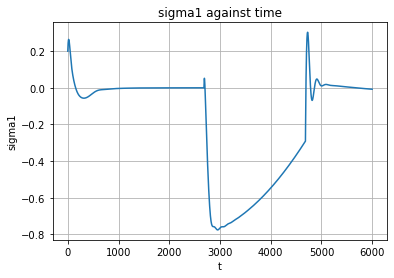

In [28]:
 # Plotting sigma propogation and omega propogation

t=time_propogation

fig1 = plt.figure
plt.plot(t, np.array(sigma_propogation)[:,0])
plt.xlabel("t")
plt.ylabel("sigma1")
plt.title("sigma1 against time")
plt.grid()
plt.show()


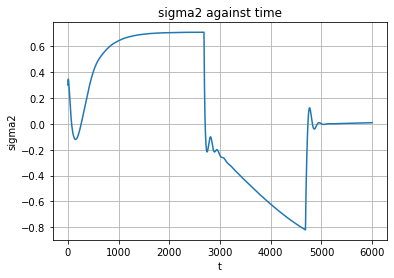

In [29]:
fig2 = plt.figure
plt.plot(t, np.array(sigma_propogation)[:,1])
plt.xlabel("t")
plt.ylabel("sigma2")
plt.title("sigma2 against time")
plt.grid()
plt.show()

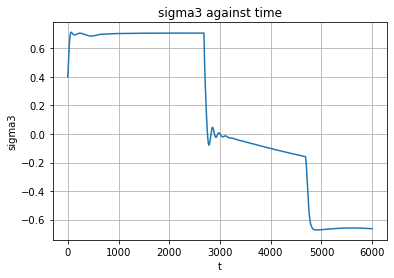

In [30]:
fig3 = plt.figure
plt.plot(t, np.array(sigma_propogation)[:,2])
plt.xlabel("t")
plt.ylabel("sigma3")
plt.title("sigma3 against time")
plt.grid()
plt.show()

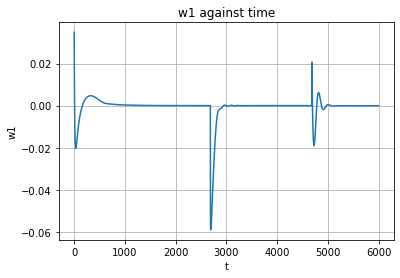

In [31]:
fig4 = plt.figure
plt.plot(t, np.array(w_propogation)[:,0])
plt.xlabel("t")
plt.ylabel("w1")
plt.title("w1 against time")
plt.grid()
plt.show()

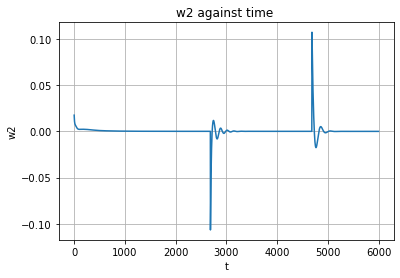

In [32]:
fig5 = plt.figure
plt.plot(t, np.array(w_propogation)[:,1])
plt.xlabel("t")
plt.ylabel("w2")
plt.title("w2 against time ")
plt.grid()
plt.show()

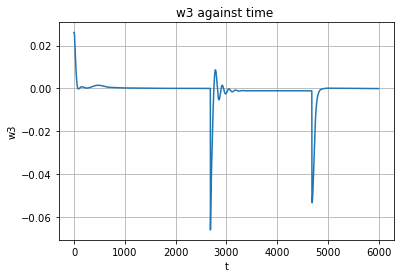

In [33]:
fig6 = plt.figure
plt.plot(t, np.array(w_propogation)[:,2])
plt.xlabel("t")
plt.ylabel("w3")
plt.title("w3 against time ")
plt.grid()
plt.show()


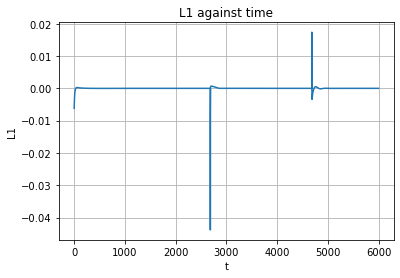

In [34]:
fig7 = plt.figure
plt.plot(t, np.array(L_propogation)[:,0])
plt.xlabel("t")
plt.ylabel("L1")
plt.title("L1 against time")
plt.grid()
plt.show()

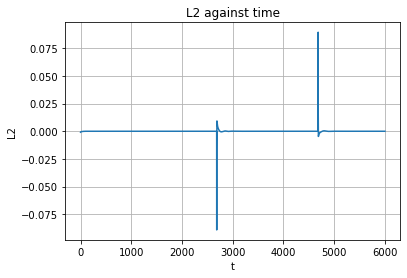

In [35]:
fig8 = plt.figure
plt.plot(t, np.array(L_propogation)[:,1])
plt.xlabel("t")
plt.ylabel("L2")
plt.title("L2 against time")
plt.grid()
plt.show()

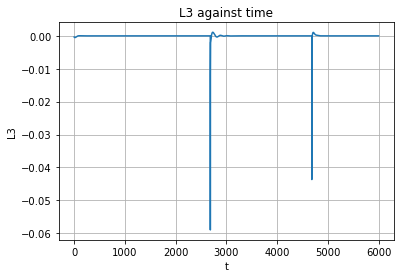

In [36]:
fig9 = plt.figure
plt.plot(t, np.array(L_propogation)[:,2])
plt.xlabel("t")
plt.ylabel("L3")
plt.title("L3 against time")
plt.grid()
plt.show()

In [37]:
# final direction cosine matrices

DCMs=[]
for i in range (t_final):
    DCMs.append(dcm_from_mrp(np.array(sigma_propogation)[i]))

DCMs = DCMs

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from IPython.display import HTML
import ffmpeg
from IPython.display import Video
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.image as mpimg

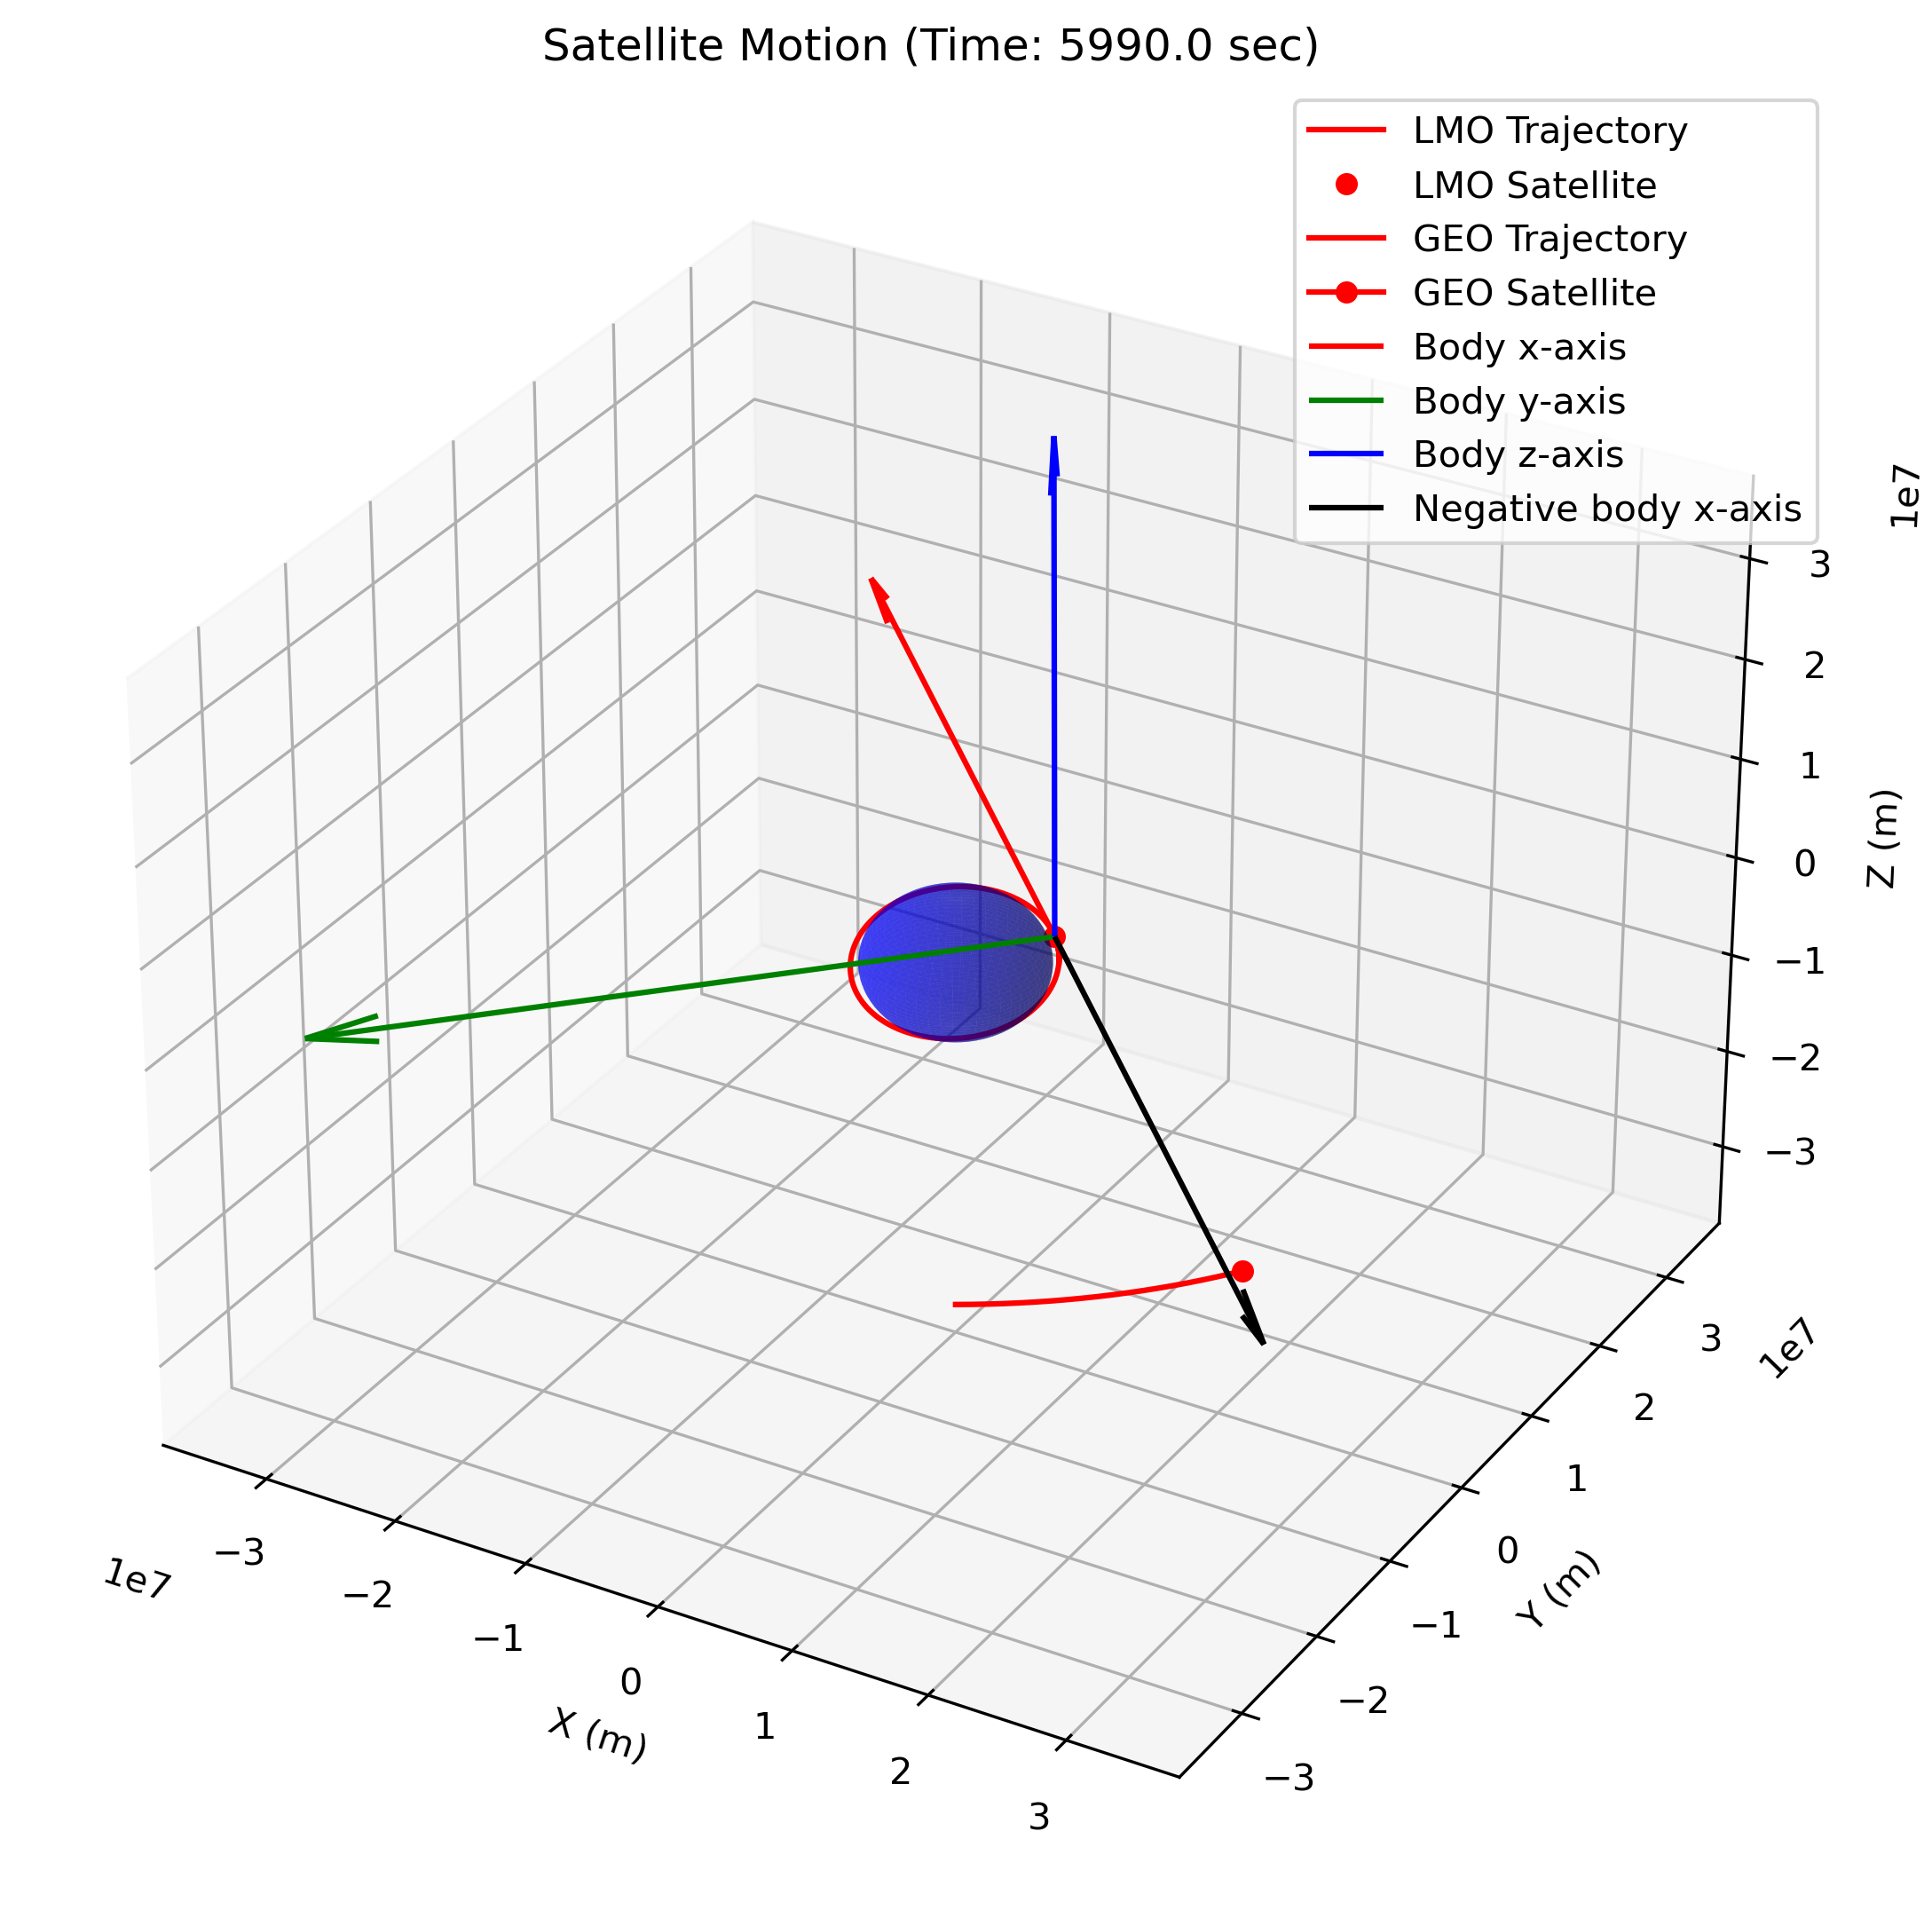

In [39]:
# Function to create the Earth sphere
def plot_earth(ax, radius=6378e3):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = radius * np.outer(np.cos(u), np.sin(v))
    y = radius * np.outer(np.sin(u), np.sin(v))
    z = radius * np.outer(np.ones(np.size(u)), np.cos(v))
    
    ax.plot_surface(x, y, z, color='b', alpha=0.5)

# Function to animate the satellites
def animate_satellites(x_lmo, y_lmo, z_lmo, DCMs_lmo, 
                        x_geo, y_geo, z_geo, time, fast_forward=100):
    fig = plt.figure(figsize=(16, 9), dpi=300)
    ax = fig.add_subplot(111, projection='3d')

    # Plot Earth
    plot_earth(ax)

    # Downsample data for smoother animation
    downsample_factor = 10
    x_lmo, y_lmo, z_lmo, DCMs_lmo = x_lmo[::downsample_factor], y_lmo[::downsample_factor], z_lmo[::downsample_factor], DCMs_lmo[::downsample_factor]
    x_geo, y_geo, z_geo = x_geo[::downsample_factor], y_geo[::downsample_factor], z_geo[::downsample_factor]
    time = time[::downsample_factor]

    # Initialize trajectory and satellite dots
    traj_lmo, = ax.plot([], [], [], 'r-', label='LMO Trajectory')
    sat_lmo, = ax.plot([], [], [], 'ro', markersize=5, label='LMO Satellite')

    traj_geo, = ax.plot([], [], [], 'r-', label='GEO Trajectory')
    sat_geo, = ax.plot([], [], [], color='red', marker='o', markersize=5, label='GEO Satellite')

    # Body frame vectors
    body_vectors = {
        "x": ax.quiver(0, 0, 0, 0, 0, 0, color='r', label='Body x-axis'),
        "y": ax.quiver(0, 0, 0, 0, 0, 0, color='g', label='Body y-axis'),
        "z": ax.quiver(0, 0, 0, 0, 0, 0, color='b', label='Body z-axis'),
        "neg_x": ax.quiver(0, 0, 0, 0, 0, 0, color='black', label='Negative body x-axis')  # Added negative X-axis
    }

    ax.set_xlabel('X (m)')
    ax.set_ylabel('Y (m)')
    ax.set_zlabel('Z (m)')
    ax.legend()
    
    max_range = np.max(np.abs(np.concatenate([x_lmo, y_lmo, z_lmo, x_geo, y_geo, z_geo])))
    ax.set_xlim(-max_range, max_range)
    ax.set_ylim(-max_range, max_range)
    ax.set_zlim(-max_range, max_range)

    # Animation update function
    def update(frame):
        traj_lmo.set_data(x_lmo[:frame], y_lmo[:frame])
        traj_lmo.set_3d_properties(z_lmo[:frame])

        sat_lmo.set_data(x_lmo[frame], y_lmo[frame])
        sat_lmo.set_3d_properties(z_lmo[frame])

        traj_geo.set_data(x_geo[:frame], y_geo[:frame])
        traj_geo.set_3d_properties(z_geo[:frame])

        sat_geo.set_data(x_geo[frame], y_geo[frame])
        sat_geo.set_3d_properties(z_geo[frame])

        R = DCMs_lmo[frame]
        scale = 0.5*2*50000000  
        body_x_vec = R[:, 0] * scale
        body_y_vec = R[:, 1] * scale
        body_z_vec = R[:, 2] * scale
        neg_x_vec = -R[:, 0] * scale  # Negative X-axis

        for key in body_vectors:
            body_vectors[key].remove()
            
        arrow_length_ratio=0.1
        body_vectors["x"] = ax.quiver(x_lmo[frame], y_lmo[frame], z_lmo[frame], body_x_vec[0], body_x_vec[1], body_x_vec[2], color='r',arrow_length_ratio=arrow_length_ratio)
        body_vectors["y"] = ax.quiver(x_lmo[frame], y_lmo[frame], z_lmo[frame], body_y_vec[0], body_y_vec[1], body_y_vec[2], color='g',arrow_length_ratio=arrow_length_ratio)
        body_vectors["z"] = ax.quiver(x_lmo[frame], y_lmo[frame], z_lmo[frame], body_z_vec[0], body_z_vec[1], body_z_vec[2], color='b',arrow_length_ratio=arrow_length_ratio)
        body_vectors["neg_x"] = ax.quiver(x_lmo[frame], y_lmo[frame], z_lmo[frame], neg_x_vec[0], neg_x_vec[1], neg_x_vec[2], color='black',arrow_length_ratio=arrow_length_ratio)

        ax.set_title(f"Satellite Motion (Time: {time[frame]:.1f} sec)")
        return traj_lmo, sat_lmo, traj_geo, sat_geo, *body_vectors.values()

    total_duration = time[-1] - time[0]
    frame_interval = (total_duration / len(x_lmo)) * 1000  
    ani = animation.FuncAnimation(fig, update, frames=len(x_lmo), interval=frame_interval, blit=False)
    return ani

# Load NumPy arrays
x_lmo, y_lmo, z_lmo = x_inertial_lmo, y_inertial_lmo, z_inertial_lmo
x_geo, y_geo, z_geo = x_inertial_gmo, y_inertial_gmo, z_inertial_gmo
time = np.array(time_propogation)
DCMs_lmo = DCMs  # Shape (N,3,3)

# Create animation
ani = animate_satellites(x_lmo, y_lmo, z_lmo, DCMs_lmo, 
                         x_geo, y_geo, z_geo, time, fast_forward=100)

# Save animation as MP4
ani.save('satellite_dual_animation.mp4', writer='ffmpeg', fps=30)

# Display in Jupyter Notebook
from IPython.display import Video
Video("satellite_dual_animation.mp4")
